In [ ]:
# kaggle api token upload problem solved
!pip install -q kaggle
!gdown --id 1wObfz33pLg8oSVbz8kOMS7zepsFw71kE
!mkdir ~/.kaggle/
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# **[Downloading Datasets from kaggle Unzipping it]**

In [ ]:
!kaggle datasets download -d kazanova/sentiment140

 93% 75.0M/80.9M [00:00<00:00, 81.7MB/s]
100% 80.9M/80.9M [00:00<00:00, 89.0MB/s]


In [ ]:
!unzip sentiment140 -d '/content/sentiment140' 

Archive:  sentiment140.zip
  inflating: /content/sentiment140/training.1600000.processed.noemoticon.csv  


In [ ]:
filepath = "/content/sentiment140"

# **Natural Language Processing or NLP**
  This is a branch of Artificial Intelligence which deal with bridging the machines understanding humans in their Natural Language. Natural Language can be in form of text or sound, which are used for humans to communicate each other. NLP can enable humans to communicate to machines in a natural way.



<img src= "https://d1sjtleuqoc1be.cloudfront.net/wp-content/uploads/2019/04/25112909/shutterstock_1073953772.jpg" height="60%" width="60%" >

# **Text Classification**
This is a process involved in Sentiment Analysis. It is classification of peoples opinion or expressions into different sentiments. Sentiments include Positive, Neutral, and Negative, Review Ratings and Happy, Sad. Sentiment Analysis can be done on different consumer centered industries to analyse people's opinion on a particular product or subject.

In this notebook, we'll develop a **Sentiment Analysis model** to categorize a tweet as **Positive or Negative**.

# **Importing Libraries**
Here we are importing basic

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#importing regular expressions and string
import re 
import string

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
#nltk - natural language tool kit
#for preprocessing
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# **Loading Dataset**

In [ ]:
def load_dataset(filepath, cols):
  df = pd.read_csv(filepath, encoding = 'latin-1', header = None)
  df.columns = cols

  return df

In [ ]:
df = load_dataset('/content/sentiment140/training.1600000.processed.noemoticon.csv',['sentiment', 'id', 'date', 'query', 'user_id', 'text'])
df.head()

,sentiment,id,date,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


# **Delete Unwanted Cols**

In [ ]:
def delete_reduntant_cols(df, cols):
  for col in cols:
    del df[col]
  return df

In [ ]:
df = delete_reduntant_cols(df, ['id', 'date', 'query', 'user_id'])
df.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


Text(0.5, 1.0, 'Sentiment Data Distribution')

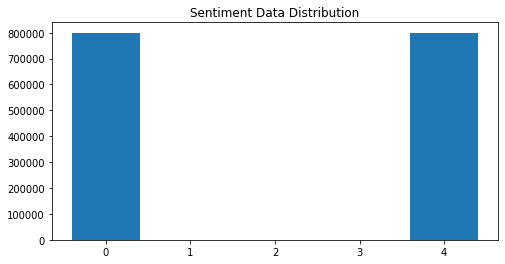

In [ ]:
val_count = df.sentiment.value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Sentiment Data Distribution")

# **Workig with Textual Data [Preprocessing Tasks]**



## **1.   Casing**
#### We will covert all the letters to
*  Uppercase
*  Lowercase.

## **2. Noise Removal**
#### We will remove unwanted characters such as
*  HTML tags
*  punctuation marks
*  special characters
*  blank spaces

## **3. Tokenization**
#### Here we will be turning all the tweets into tokens and the tokens would be words that are separated by spaces in the text.

## **4. Stopword Removal**
#### Removing the words which don't actually make any sense and don't contribute much to the models.
## **5. Text Normalization(Stemming and Lemmatization)**
#### Text Normalization is basically done with 2 methods.

## **Stemming**
Stemming eliminates affixes (prefixes, suffixes, infixes) in order to obtain a word stem or to reach the root of a word.

For eg: Forms of word "INTERACT"
* Interact ---> Interact
* Interacting ---> Interact
* Interacted ---> Interact
* Interactions ---> Interact
* Interaction ---> Interact

## **Lemmatization**
Stemming sometimes loses the actual meaning of thye word while getting the root word. Lemmatization reduces the inflected word properly by ensuring it's morphological analysis. It returns the base or the dictionary form of a word which is also known as lemma.

For eg: 
* Run/Running/Ran ---> Run
* Better ---> Good
* am/are/is ---> be

In [ ]:
#Removing StopWords
stop_words = stopwords.words('english')

# for stemming we are using SnowballStemmer here
stemmer = SnowballStemmer('english')

# we are using WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# for removing urls, punctuations, user tag @ references and '#' from tweet
text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [ ]:
def preprocess(text, stem=False):
  #performing Casing
  #converting all the letters into lowercase letters
  text = str(text).lower()

  #Noise removal
  text = re.sub(text_cleaning_re, ' ', text).strip()

  #remove stopwords, stemming and lemmatizing
  tokens = []
  for token in text.split():
    if len(token)>1:
      # Lemmatizing the word.
      token = lemmatizer.lemmatize(token)

    #removing stopwords
    if token not in stop_words:

      #applying stemming
      if stem:
        tokens.append(stemmer.stem(token))
      else:
        tokens.append(token)
  return " ".join(tokens)

In [ ]:
df.text = df.text.apply(lambda x: preprocess(x))
df.head()

,sentiment,text
0,0,awww bummer shoulda got david carr third day
1,0,upset update facebook texting might cry result...
2,0,dived many time ball managed save 50 rest go b...
3,0,whole body feel itchy like fire
4,0,behaving mad see


# **Positive and Negative Words**

## POSITIVE WORDS



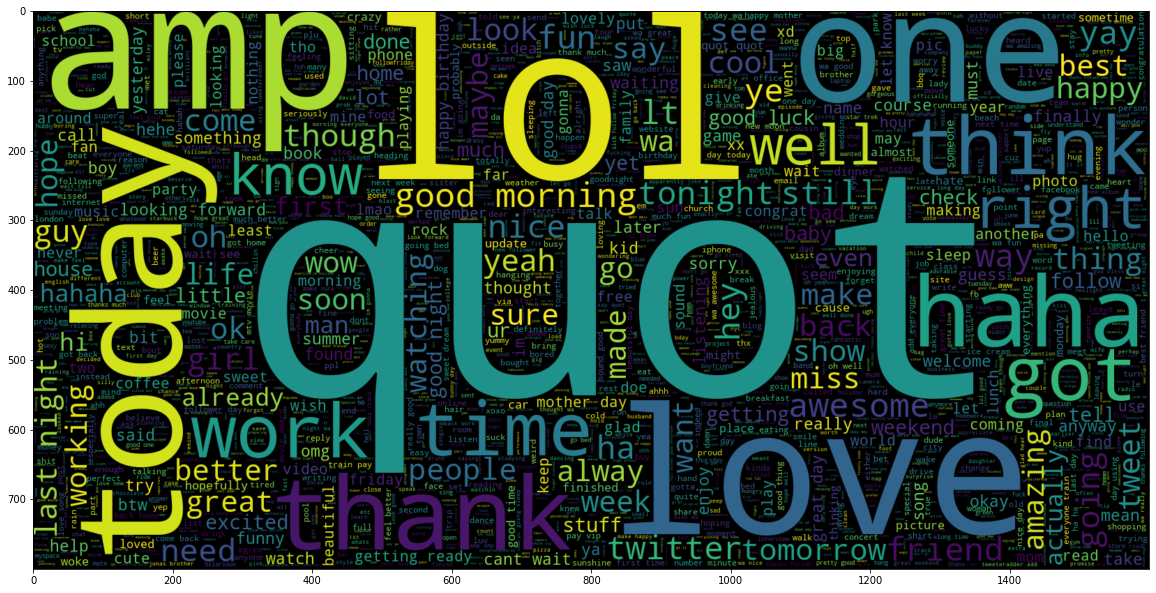

In [ ]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 4].text))
plt.imshow(wc , interpolation = 'bilinear')

## NEGATIVE WORDS

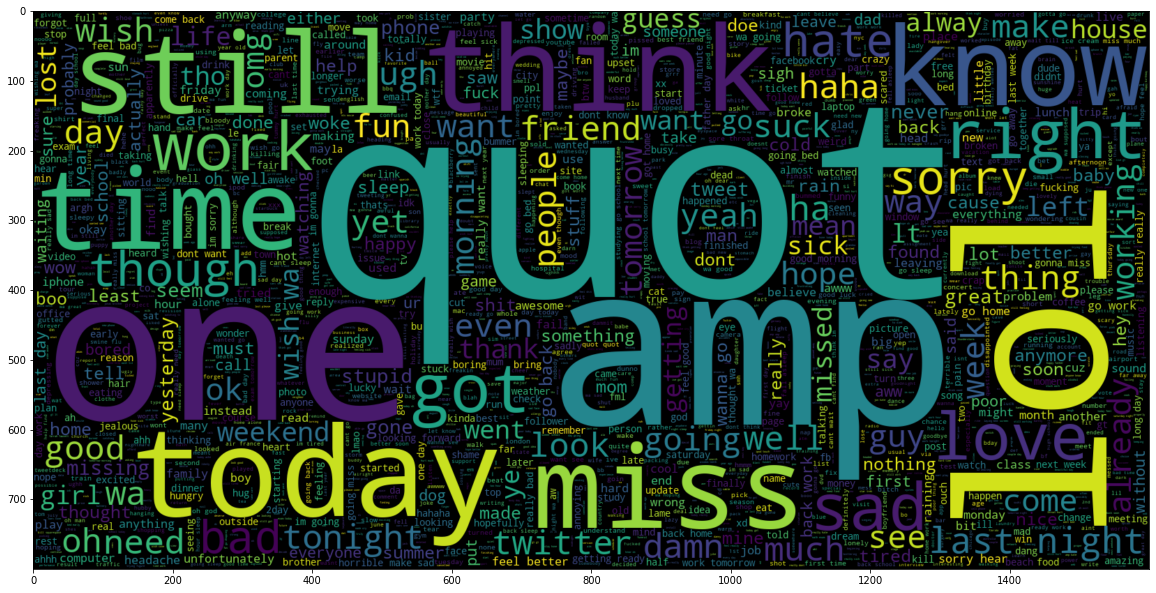

In [ ]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 0].text))
plt.imshow(wc , interpolation = 'bilinear')

# **Train Test Split**

In [ ]:
TRAIN_SIZE = 0.8

Here **train_test_split** will shuffle the dataset and split it to gives training and testing dataset. It's important to shuffle our dataset before training.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, df.sentiment,
                                                    test_size = 0.05, random_state = 0)
print(f'Data Split done.')

Data Split done.


In [ ]:
X_train.head()

,sentiment,text
391051,0,working double texas roadhouse
197655,0,envy everyone thats working today l nice day
905468,4,hehe thanks everyone class laughing
1492339,4,woot woot haha gonna go movie uncle iphone
551346,0,pissed ha use crappy phone til get new one


# **Vectorizing Tokens**
#### Vectorization is the process of converting tokens into numbers. It is important because machine learning algorithms can't work with textual data they work with numbers. 




We are using **"tf idf"** vectorizer for this which is basically known as *term frequency inverse document frequency*.

**TF-IDF Vectoriser** converts a collection of raw documents to a matrix of TF-IDF features. The Vectoriser is usually trained on only the X_train["text"] dataset.

* **ngram_range** is the range of number of words in a sequence.  
[e.g "very expensive" is a 2-gram that is considered as an extra feature separately from "very" and "expensive" when you have a n-gram range of (1,2)]

* **max_features** specifies the number of features to consider.

In [ ]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train["text"])
print(f'Vectoriser fitted.')

Vectoriser fitted.


In [ ]:
X_train = vectoriser.transform(X_train["text"])
X_test  = vectoriser.transform(X_test["text"])
print(f'Data Transformed.')

Data Transformed.


In [ ]:
X_train

<1520000x500000 sparse matrix of type '<class 'numpy.float64'>'
	with 15648761 stored elements in Compressed Sparse Row format>

# **MODEL**

We're creating 3 different types of model for our sentiment analysis problem:

*   **Bernoulli Naive Bayes (BernoulliNB)**
*   **Linear Support Vector Classification (LinearSVC)**
*   **Logistic Regression (LR)**

Since our dataset is not skewed, i.e. it has equal number of Positive and Negative Predictions. We're choosing Accuracy as our evaluation metric. Furthermore, we're plotting the Confusion Matrix to get an understanding of how our model is performing on both classification types.





In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [ ]:
def model_Evaluate(model):
    
    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

## **Bernoulli Naive Bayes (BernoulliNB)**

**BernoulliNB** implements the naive Bayes training and classification algorithms for data that is distributed according to multivariate Bernoulli distributions; i.e., there may be multiple features but each one is assumed to be a binary-valued (Bernoulli, boolean) variable.

              precision    recall  f1-score   support

           0       0.80      0.75      0.77     39989
           4       0.77      0.81      0.79     40011

    accuracy                           0.78     80000
   macro avg       0.78      0.78      0.78     80000
weighted avg       0.78      0.78      0.78     80000



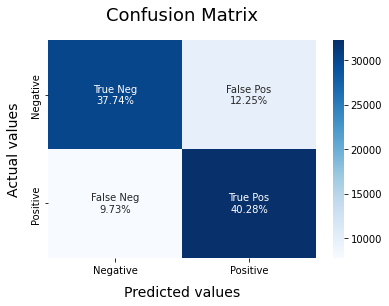

In [ ]:
BNBmodel = BernoulliNB(alpha = 2)
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)

## **Linear Support Vector Classification (LinearSVC)**

The objective of a **Linear SVC (Support Vector Classifier)** is to fit to the data you provide, returning a "best fit" hyperplane that divides, or categorizes, your data. From there, after getting the hyperplane, you can then feed some features to your classifier to see what the "predicted" class is. It is similar to SVC with parameter kernel=’linear’, but implemented in terms of liblinear rather than libsvm, so it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples.

              precision    recall  f1-score   support

           0       0.79      0.77      0.78     39989
           4       0.77      0.80      0.78     40011

    accuracy                           0.78     80000
   macro avg       0.78      0.78      0.78     80000
weighted avg       0.78      0.78      0.78     80000



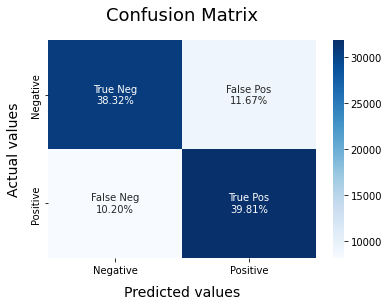

In [ ]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)

## **Logistic Regression (LR)**

**Logistic regression** is a statistical analysis method to predict a binary outcome, such as yes or no, based on prior observations of a data set. A logistic regression model predicts a dependent data variable by analyzing the relationship between one or more existing independent variables.


              precision    recall  f1-score   support

           0       0.80      0.78      0.79     39989
           4       0.78      0.81      0.80     40011

    accuracy                           0.79     80000
   macro avg       0.79      0.79      0.79     80000
weighted avg       0.79      0.79      0.79     80000



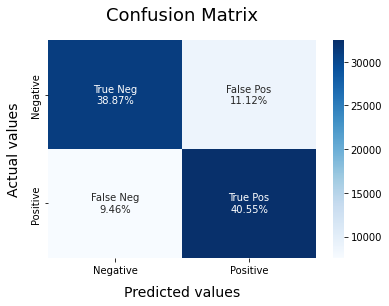

In [ ]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)

### We can clearly see that the **Logistic Regression** Model performs the best out of all the different models that we tried.

### Although it should also be noted that the **BernoulliNB** Model is the fastest to train and predict on.

We're using PICKLE to save Vectoriser and BernoulliNB, Logistic Regression Model for later use.

In [ ]:
import pickle

In [ ]:
file = open('vectoriser-ngram-(1,2).pickle','wb')
pickle.dump(vectoriser, file)
file.close()

file = open('Sentiment-LR.pickle','wb')
pickle.dump(LRmodel, file)
file.close()

file = open('Sentiment-BNB.pickle','wb')
pickle.dump(BNBmodel, file)
file.close()

### In terms of NLP, we've trained a pretty good model here. Given that the baseline human accuracy in these tasks is also quite low, around 80% accuracy is sufficient. You can also explore the dataset; some tweets may be in languages other than English. As a result, our Embedding and Tokenizing won't affect them. However, in a real-world scenario, this model is capable of handling the majority of sentiment analysis tasks.